# Library import

In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import random
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the data file

In [ ]:
#Change path according to your drive location!
INPUT_MAESTRO_DATA = "/content/drive/MyDrive/ProteoSAFe-MAESTRO-d6178bdd-identified_variants_merged_protein_regions/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants_original = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory=False)

In [ ]:
variants_original.shape

(101461, 268)

In [ ]:
def len_df(df, col_name, val):
    return len(df[df[col_name] == val])

In [ ]:
variants_original.columns

Index(['rowid', 'ccms_row_id', 'Algorithm', 'Filename', 'Cluster_index',
       'Peptide', 'Unmodified_sequence', 'Charge',
       '_dyn_#Intensity_for_cluster',
       '_dyn_#Intensity_for_unmodified_sequence',
       ...
       'PSP_site_match', 'DrugBank_drugs', 'Parent_mass',
       'Num_PSP_Drugbank_events', 'Start_AA_1_based', 'End_AA_1_based',
       'Num_spectra_for_cluster', 'Num_spectra_for_unmodified_sequence',
       'Num_spectra_for_peptide_variant', 'Internal_ref_orig_intensity'],
      dtype='object', length=268)

In [ ]:
# we only need the intensities for each peptide, noted as "...intensity_for_peptide_variant"
variants_processed = variants_original[
    ['Peptide'] + [c for c in variants_original.columns if 'intensity_for_peptide_variant' in c]
]

# replace zero values (which are all intensities) in the processed matrix with N/As

variants_processed = variants_processed.set_index('Peptide')
#set the index to be each Peptide

# variants_processed.rename(columns = {'Peptide':'Patients'}, inplace = True)
#transpose the matrix, so each column is a peptide
variants_processed = variants_processed.T
variants_processed.replace(0.0, np.nan, inplace=True)
# variants_processed.dropna(inplace = True, axis=1)

#only retain first two elements in the headers
variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))

#set the condition to the first element
variants_processed['Condition'] = variants_processed.index.map(lambda x: x.split('.')[0])

variants_processed['Original Class'] = variants_processed['Condition']
variants_processed['Original Class'].replace({"_dyn_#Severe-COVID-19":"Severe-COVID-19", "_dyn_#Non-severe-COVID-19":"Non-severe-COVID-19",
                                         "_dyn_#Healthy":"Healthy", "_dyn_#Symptomatic-non-COVID-19":"Symptomatic-non-COVID-19"},
                                        inplace=True)

variants_processed['Condition'].replace({"_dyn_#Severe-COVID-19":"Covid", "_dyn_#Non-severe-COVID-19":"Covid",
                                         "_dyn_#Healthy":"No-Covid", "_dyn_#Symptomatic-non-COVID-19":"No-Covid"},
                                        inplace=True)

#only keep two conditions, for both severe and non-severe COVID-19
variants_processed = variants_processed[(variants_processed.Condition == "Covid") 
                             | (variants_processed.Condition == "No-Covid")]

variants_processed['Patients'] = variants_processed.index
variants_processed.head()  # print out to investigate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition,Original Class,Patients
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,No-Covid,Healthy,_dyn_#Healthy.HC1
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No-Covid,Healthy,_dyn_#Healthy.HC10
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No-Covid,Healthy,_dyn_#Healthy.HC12
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No-Covid,Healthy,_dyn_#Healthy.HC13
_dyn_#Healthy.HC17,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN,No-Covid,Healthy,_dyn_#Healthy.HC17


In [ ]:
peptides = ['A.[277.544]ADPHE(C,57.021)YA(K,304.207).V',
'K.[304.207]SH(C,57.021)IAEVE(N,67.928)DEMPADLPS.L',
'L.[304.207](D,-20.029)NWDSVTSTFS(K,304.207).L',
'F.[304.207]A(Q,13.703)YLQQ(C,57.021)PFEDHV(K,304.207).L',
'C.[304.207](C,108.04)HGDLLE(C,57.021)ADDRADLA(K,304.207).Y',
'K.[304.207](A,288.468)VMDDFAAFVE(K,304.207).C',
'K.[304.207]L(R,20.986)TEGDGVYTLNNE(K,304.207).Q',
'A.[230.752]VMDDFAAFVE(K,304.207).C',
'Y.[220.078]I(C,57.021)ENQDSISS(K,304.207)L(K,304.207).E',
'M.[304.207](P,39.161)ADLPSLAADFVES(K,304.207).D']

for peptide in peptides:
  print(variants_processed[peptide].isna().sum())


78
79
67
66
77
78
67
77
78
36


In [ ]:
variants_processed.shape

(90, 101464)

In [ ]:
#Change path according to your drive location!
INPUT_MAESTRO_DATA_NEW = "/content/drive/MyDrive/ProteoSAFe-MAESTRO-d6178bdd-identified_variants_merged_protein_regions/main_imputed_new_renamed_2.csv"
variants_new = pd.read_csv(INPUT_MAESTRO_DATA_NEW, sep=",", low_memory=False)
variants_new.rename(columns = {'OG Class':'Original Class'}, inplace = True)
variants_new = variants_new.drop(columns=['Unnamed: 0'])

In [ ]:
'M.[304.207](P,39.161)ADLPSLAADFVES(K,304.207).D' in variants_processed

True

In [ ]:
variants_new.shape

(90, 98076)

In [ ]:
variants_new.head()

,Patients,"R.[304.207]DQLPYI(C,57.021)QF.G","R.[304.207]DQLPYI(C,57.021)Q.F","R.[304.207]DQLPYI(C,57.021)QFGIV.-","K.[304.207]NWETEITAQPDGG(K,304.207)TEN.C","K.[304.207]TEN(C,57.021)AVLSGAA(N,0.984)G(K,304.207).W","K.[304.207]TEN(C,57.021)AVLSGAANG(K,304.207).W","N.[304.207](C,57.021)AVLSGAANG(K,304.207).W","K.[304.207]NWETEITAQPDGG(K,304.207).T","K.[304.207]NWETEITAQPDGG(K,304.207)TEN(C,57.021)AVLSGAA(N,0.984)G(K,304.207).W",...,"K.[304.207]GLEYVSAIS(S,5.151)NGGSTYY.A","I.[304.207]SSNGGS(T,-44.03)YYADSV(K,304.207).G","S.[304.207]SN(G,0.99)GSTYYADSV(K,304.207).G","K.[304.207]GLEYVS(A,132.101)ISSNGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAIS(S,27.059)NGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAISSNGGST(Y,-16.537)YADSV(K,304.207).G","K.[304.207]GLEYVSAISS(N,-41.023)GGSTYYADSV(K,304.207).G","S.[304.207]NGGSTYYADSV(K,304.207).G",Condition,Original Class
0,_dyn_#Healthy.HC1,1.350591,1.023720,0.101262,0.936466,1.160217,0.797261,1.332004,0.891366,1.350043,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
1,_dyn_#Healthy.HC10,1.433588,1.046761,0.196550,0.936895,1.033995,0.764209,1.108105,0.902414,1.478806,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
2,_dyn_#Healthy.HC12,1.460692,0.741574,0.117640,0.828555,0.921057,0.752979,0.704017,0.898037,1.533979,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
3,_dyn_#Healthy.HC13,1.490027,0.688510,0.056697,0.803890,0.894024,0.758597,0.691046,0.926202,1.395241,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
4,_dyn_#Healthy.HC17,1.398069,1.032466,1.331304,0.923384,1.231336,0.886127,1.227946,0.896269,1.410563,...,1.604117,12.739520,2.370708,1.385831,0.277959,0.976457,1.40631,4.600786,1,Healthy


In [ ]:
variants_processed.head()

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition,Original Class,Patients
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,No-Covid,Healthy,_dyn_#Healthy.HC1
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No-Covid,Healthy,_dyn_#Healthy.HC10
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No-Covid,Healthy,_dyn_#Healthy.HC12
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No-Covid,Healthy,_dyn_#Healthy.HC13
_dyn_#Healthy.HC17,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN,No-Covid,Healthy,_dyn_#Healthy.HC17


In [ ]:
#Get the missing columns
list1 = variants_processed.columns
list2 = variants_new.columns
main_list = list(set(list1) - set(list2))

In [ ]:
df1 = pd.DataFrame(variants_processed[main_list], index = variants_processed['Patients'])
df2 = pd.DataFrame(variants_new)
df2.index = df1.index
res = pd.concat([df1,df2], axis=1, join = 'inner')

In [ ]:
res.head()

,"K.[304.207]GLEWIG(E,-64.055)IYHSGSPNYNPSL(K,304.207).S","R.[304.207]R(D,-28.005)AEAWFNE(K,304.207).S",-.{125.417}[304.207]EVQLVESGGGLVQPGGSLR.L,"K.[304.207]ADD(K,304.207)ET(C,57.021)FAE(E,35.494)PTMRIR.E","Q.[304.207]LVESGG(G,44.034)LVQPGGSLR.L","K.[304.207]QWIN(K,304.207)AVGD(K,304.207)LPE(C,57.021)EAGATLINEQWLLTTA(K,304.207).N","K.[304.207]L(C,57.021)YVALDFEQE(M,-14.991)AMAASSSSLE(K,304.207).S","K.[304.207](F,-35.037)RYLYEIAR.R","R.[304.207]R(H,5.977)PYFYAPELLFFA(K,304.207).R","K.[304.207]GLE(W,-22.964)VSYSSGNSGYTNYADSV(K,304.207).G",...,"K.[304.207]GLEYVSAIS(S,5.151)NGGSTYY.A","I.[304.207]SSNGGS(T,-44.03)YYADSV(K,304.207).G","S.[304.207]SN(G,0.99)GSTYYADSV(K,304.207).G","K.[304.207]GLEYVS(A,132.101)ISSNGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAIS(S,27.059)NGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAISSNGGST(Y,-16.537)YADSV(K,304.207).G","K.[304.207]GLEYVSAISS(N,-41.023)GGSTYYADSV(K,304.207).G","S.[304.207]NGGSTYYADSV(K,304.207).G",Condition,Original Class
Patients,,,,,,,,,,,,,,,,,,,,,
_dyn_#Healthy.HC1,1.167505,NaN,0.930832,NaN,NaN,0.743240,NaN,1.043593,NaN,NaN,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC10,NaN,10.441582,NaN,NaN,NaN,0.651068,0.817163,NaN,NaN,NaN,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC12,NaN,3.621786,NaN,NaN,NaN,0.233692,0.361150,NaN,NaN,NaN,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC13,NaN,6.146458,NaN,NaN,NaN,NaN,0.410763,NaN,NaN,NaN,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC17,NaN,1.244000,NaN,NaN,0.500522,NaN,1.108475,0.778626,NaN,0.600533,...,1.604117,12.739520,2.370708,1.385831,0.277959,0.976457,1.40631,4.600786,1,Healthy


In [ ]:
res.to_csv('merged.csv', sep='\t')

# Preprocessing

In [ ]:
def len_df(df, col_name, val):
    return len(df[df[col_name] == val])

In [ ]:
variants = res
variants.shape
variants.replace(np.nan, 0.0, inplace=True)

In [ ]:
variants['Condition'].replace(['Covid', 'No-Covid'], [0, 1], inplace=True)

In [ ]:
variants.head()

,"K.[304.207]GLEWIG(E,-64.055)IYHSGSPNYNPSL(K,304.207).S","R.[304.207]R(D,-28.005)AEAWFNE(K,304.207).S",-.{125.417}[304.207]EVQLVESGGGLVQPGGSLR.L,"K.[304.207]ADD(K,304.207)ET(C,57.021)FAE(E,35.494)PTMRIR.E","Q.[304.207]LVESGG(G,44.034)LVQPGGSLR.L","K.[304.207]QWIN(K,304.207)AVGD(K,304.207)LPE(C,57.021)EAGATLINEQWLLTTA(K,304.207).N","K.[304.207]L(C,57.021)YVALDFEQE(M,-14.991)AMAASSSSLE(K,304.207).S","K.[304.207](F,-35.037)RYLYEIAR.R","R.[304.207]R(H,5.977)PYFYAPELLFFA(K,304.207).R","K.[304.207]GLE(W,-22.964)VSYSSGNSGYTNYADSV(K,304.207).G",...,"K.[304.207]GLEYVSAIS(S,5.151)NGGSTYY.A","I.[304.207]SSNGGS(T,-44.03)YYADSV(K,304.207).G","S.[304.207]SN(G,0.99)GSTYYADSV(K,304.207).G","K.[304.207]GLEYVS(A,132.101)ISSNGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAIS(S,27.059)NGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAISSNGGST(Y,-16.537)YADSV(K,304.207).G","K.[304.207]GLEYVSAISS(N,-41.023)GGSTYYADSV(K,304.207).G","S.[304.207]NGGSTYYADSV(K,304.207).G",Condition,Original Class
Patients,,,,,,,,,,,,,,,,,,,,,
_dyn_#Healthy.HC1,1.167505,0.000000,0.930832,0.0,0.000000,0.743240,0.000000,1.043593,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC10,0.000000,10.441582,0.000000,0.0,0.000000,0.651068,0.817163,0.000000,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC12,0.000000,3.621786,0.000000,0.0,0.000000,0.233692,0.361150,0.000000,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC13,0.000000,6.146458,0.000000,0.0,0.000000,0.000000,0.410763,0.000000,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC17,0.000000,1.244000,0.000000,0.0,0.500522,0.000000,1.108475,0.778626,0.0,0.600533,...,1.604117,12.739520,2.370708,1.385831,0.277959,0.976457,1.40631,4.600786,1,Healthy


# Draw histograms/plots

In [ ]:
severe = len_df(variants, 'Original Class', 'Severe-COVID-19')
non_severe = len_df(variants, 'Original Class', 'Non-severe-COVID-19')
healthy = len_df(variants, 'Original Class', 'Healthy')
symp_non_covid = len_df(variants, 'Original Class', 'Symptomatic-non-COVID-19')

severe_df = variants[variants['Original Class'] == 'Severe-COVID-19']
non_severe_df = variants[variants['Original Class'] == 'Non-severe-COVID-19']
healthy_df = variants[variants['Original Class'] == 'Healthy']
symp_non_covid_df = variants[variants['Original Class'] == 'Symptomatic-non-COVID-19']

In [ ]:
severe_df.shape
non_severe_df.shape
healthy_df.shape

(22, 101464)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_severe, X_test_severe, y_train_severe, y_test_severe = train_test_split(severe_df, severe_df['Condition'], test_size=0.2, random_state=1)

X_train_non_severe, X_test_non_severe, y_train_non_severe, y_test_non_severe = train_test_split(non_severe_df, non_severe_df['Condition'], test_size=0.2, random_state=1)

X_train_healthy, X_test_healthy, y_train_healthy, y_test_healthy = train_test_split(healthy_df, healthy_df['Condition'], test_size=0.2, random_state=1)

X_train_symp_non_covid, X_test_symp_non_covid, y_train_symp_non_covid, y_test_symp_non_covid = train_test_split(symp_non_covid_df, symp_non_covid_df['Condition'], test_size=0.2, random_state=1)

In [ ]:
X_train = pd.concat([X_train_severe, X_train_non_severe, X_train_healthy, X_train_symp_non_covid]).drop('Condition', 1).drop('Original Class', 1)
X_test = pd.concat([X_test_severe, X_test_non_severe, X_test_healthy, X_test_symp_non_covid]).drop('Condition', 1).drop('Original Class', 1)

y_train = pd.concat([y_train_severe, y_train_non_severe, y_train_healthy, y_train_symp_non_covid])
y_test = pd.concat([y_test_severe, y_test_non_severe, y_test_healthy, y_test_symp_non_covid])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X_train.head()

,"K.[304.207]GLEWIG(E,-64.055)IYHSGSPNYNPSL(K,304.207).S","R.[304.207]R(D,-28.005)AEAWFNE(K,304.207).S",-.{125.417}[304.207]EVQLVESGGGLVQPGGSLR.L,"K.[304.207]ADD(K,304.207)ET(C,57.021)FAE(E,35.494)PTMRIR.E","Q.[304.207]LVESGG(G,44.034)LVQPGGSLR.L","K.[304.207]QWIN(K,304.207)AVGD(K,304.207)LPE(C,57.021)EAGATLINEQWLLTTA(K,304.207).N","K.[304.207]L(C,57.021)YVALDFEQE(M,-14.991)AMAASSSSLE(K,304.207).S","K.[304.207](F,-35.037)RYLYEIAR.R","R.[304.207]R(H,5.977)PYFYAPELLFFA(K,304.207).R","K.[304.207]GLE(W,-22.964)VSYSSGNSGYTNYADSV(K,304.207).G",...,"K.[304.207]GLEYVSAISSNGGSTYYADSV(K,304.207).G","S.[304.207](A,9.046)ISSNGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAIS(S,5.151)NGGSTYY.A","I.[304.207]SSNGGS(T,-44.03)YYADSV(K,304.207).G","S.[304.207]SN(G,0.99)GSTYYADSV(K,304.207).G","K.[304.207]GLEYVS(A,132.101)ISSNGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAIS(S,27.059)NGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAISSNGGST(Y,-16.537)YADSV(K,304.207).G","K.[304.207]GLEYVSAISS(N,-41.023)GGSTYYADSV(K,304.207).G","S.[304.207]NGGSTYYADSV(K,304.207).G"
Patients,,,,,,,,,,,,,,,,,,,,,
_dyn_#Severe-COVID-19.XG43,0.000000,18.973545,0.000000,0.0,0.0,0.000000,0.000000,0.552515,0.00000,0.0,...,1.234864,1.737745,10.756751,0.088379,2.594043,1.225063,21.142659,7.988389,1.406310,0.562340
_dyn_#Severe-COVID-19.XG35,0.000000,0.000000,0.000000,0.0,0.0,0.269276,0.539972,0.470316,0.90052,0.0,...,2.360693,1.094373,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.406310,1.506168
_dyn_#Severe-COVID-19.XG44,0.000000,4.171250,0.000000,0.0,0.0,0.000000,0.000000,0.436529,0.00000,0.0,...,0.835677,0.727875,0.832528,30.181374,1.524203,0.888425,11.077303,1.692942,1.406310,12.852326
_dyn_#Severe-COVID-19.XG31,0.000000,0.000000,0.000000,0.0,0.0,0.405282,0.000000,0.282273,0.00000,0.0,...,2.360693,1.094373,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,0.948216,1.506168
_dyn_#Severe-COVID-19.XG26,1.557659,0.000000,0.951236,0.0,0.0,0.739950,0.000000,1.220538,0.00000,0.0,...,2.360693,1.094373,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.406310,1.506168


In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
X_train = X_train.drop('Patients', 1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
X_test = X_test.drop('Patients',1)
def evaluate(model, test_features, test_labels):
    # test_features.fillna(0.0, inplace=True)
    predictions = model.predict(test_features)
    acc = accuracy_score(test_labels, predictions)
    f1_score1 = f1_score(test_labels, predictions)
    prec = precision_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)

    print("Performance \n Accuracy = %f \n F1 Score = %f \n Precision = %f \n Recall = %f" % (acc, f1_score1, prec, rec))
    print('Model Performance')
    print(acc)
    print(f1_score)
    print(prec)
    print(rec) 
    print(confusion_matrix(test_labels, predictions))
    return acc

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Performance 
 Accuracy = 0.894737 
 F1 Score = 0.888889 
 Precision = 1.000000 
 Recall = 0.800000
Model Performance
0.8947368421052632
<function f1_score at 0x7fe1abc1ccb0>
1.0
0.8
[[9 0]
 [2 8]]


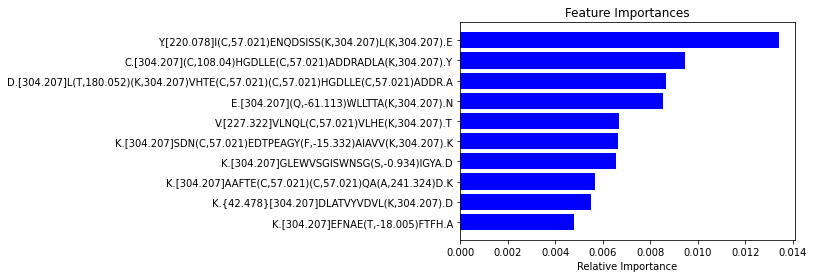

In [ ]:
from matplotlib import pyplot as plt
features = X_train.columns
importances = best_random.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10

# plt.figure(figsize=(10,100))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
output = [features[i] for i in indices[-num_features:]]
for i in range(len(output)-1,-1,-1):
  print(output[i])

Y.[220.078]I(C,57.021)ENQDSISS(K,304.207)L(K,304.207).E
C.[304.207](C,108.04)HGDLLE(C,57.021)ADDRADLA(K,304.207).Y
D.[304.207]L(T,180.052)(K,304.207)VHTE(C,57.021)(C,57.021)HGDLLE(C,57.021)ADDR.A
E.[304.207](Q,-61.113)WLLTTA(K,304.207).N
V.[227.322]VLNQL(C,57.021)VLHE(K,304.207).T
K.[304.207]SDN(C,57.021)EDTPEAGY(F,-15.332)AIAVV(K,304.207).K
K.[304.207]GLEWVSGISWNSG(S,-0.934)IGYA.D
K.[304.207]AAFTE(C,57.021)(C,57.021)QA(A,241.324)D.K
K.{42.478}[304.207]DLATVYVDVL(K,304.207).D
K.[304.207]EFNAE(T,-18.005)FTFH.A


In [ ]:
new_df = pd.DataFrame()
for col in output:
  new_df[col] = res[col]

In [ ]:
new_df.head()

,"A.[304.207](D,-16.207)DG(C,57.021)P(K,304.207)PPEIAHGYVEHSVR.Y","R.[304.207]RHPYFYAPELL(F,252.682)FA(K,304.207).R","K.[304.207]SLH(T,11.037)LFGD(K,304.207).L","K.[304.207]DVFLG(M,16.508)FLYEYAR.R","R.[304.207]E(T,318.195)YGEMAD(C,57.021)(C,57.021)A(K,304.207).Q","K.[304.207]YI(C,57.021)ENQ(D,-18.987)S.I","K.{14.998}[304.207]DIAPTLTLYVG(K,304.207).K","F.[304.207]A(Q,13.703)YLQQ(C,57.021)PFEDHV(K,304.207).L","K.[304.207](S,300.207)LHTLFGD(K,304.207).L","K.[304.207](L,-13.033)VNEVTEFA(K,304.207).T",...,"K.[304.207]EFNAE(T,-18.005)FTFH.A","K.{42.478}[304.207]DLATVYVDVL(K,304.207).D","K.[304.207]AAFTE(C,57.021)(C,57.021)QA(A,241.324)D.K","K.[304.207]GLEWVSGISWNSG(S,-0.934)IGYA.D","K.[304.207]SDN(C,57.021)EDTPEAGY(F,-15.332)AIAVV(K,304.207).K","V.[227.322]VLNQL(C,57.021)VLHE(K,304.207).T","E.[304.207](Q,-61.113)WLLTTA(K,304.207).N","D.[304.207]L(T,180.052)(K,304.207)VHTE(C,57.021)(C,57.021)HGDLLE(C,57.021)ADDR.A","C.[304.207](C,108.04)HGDLLE(C,57.021)ADDRADLA(K,304.207).Y","Y.[220.078]I(C,57.021)ENQDSISS(K,304.207)L(K,304.207).E"
Patients,,,,,,,,,,,,,,,,,,,,,
_dyn_#Healthy.HC1,0.778101,1.105583,0.383114,0.995700,1.338987,0.865409,2.738593,0.590380,0.894894,6.076200,...,0.905571,2.281604,14.188542,0.251105,1.098065,1.900731,2.287542,1.015576,1.537411,2.850042
_dyn_#Healthy.HC10,0.690262,1.681462,0.394056,0.570420,1.278056,0.796909,2.325712,0.594012,0.907786,1.815212,...,0.911246,3.329145,2.169815,1.233180,1.079789,1.892149,3.168297,4.219300,1.355763,2.948505
_dyn_#Healthy.HC12,0.861483,0.656293,0.336235,0.249035,0.512319,0.772657,1.758823,0.589669,0.874407,1.936737,...,0.897886,4.235036,1.338192,0.505974,1.101279,1.793534,0.274528,3.972045,1.292523,2.589139
_dyn_#Healthy.HC13,0.818465,0.685628,0.342044,0.225893,0.457314,0.776301,1.682800,0.580210,0.882638,0.595456,...,0.896927,1.005854,0.964378,0.376778,1.148295,1.723863,0.353590,4.123652,1.304934,2.564041
_dyn_#Healthy.HC17,0.732275,0.011569,0.417736,1.397470,1.993934,0.812231,2.326050,0.575133,0.917792,5.290490,...,0.928995,1.560921,14.191913,1.059247,0.955878,1.452098,0.627867,3.440131,1.294398,2.521490


In [ ]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        df_std[column] = df_std[column].map(lambda x: x if np.isnan(x) else min(3,max(-3,x)))
    return df_std

In [ ]:
res.head()

,"K.[304.207]GLEWIG(E,-64.055)IYHSGSPNYNPSL(K,304.207).S","R.[304.207]R(D,-28.005)AEAWFNE(K,304.207).S",-.{125.417}[304.207]EVQLVESGGGLVQPGGSLR.L,"K.[304.207]ADD(K,304.207)ET(C,57.021)FAE(E,35.494)PTMRIR.E","Q.[304.207]LVESGG(G,44.034)LVQPGGSLR.L","K.[304.207]QWIN(K,304.207)AVGD(K,304.207)LPE(C,57.021)EAGATLINEQWLLTTA(K,304.207).N","K.[304.207]L(C,57.021)YVALDFEQE(M,-14.991)AMAASSSSLE(K,304.207).S","K.[304.207](F,-35.037)RYLYEIAR.R","R.[304.207]R(H,5.977)PYFYAPELLFFA(K,304.207).R","K.[304.207]GLE(W,-22.964)VSYSSGNSGYTNYADSV(K,304.207).G",...,"K.[304.207]GLEYVSAIS(S,5.151)NGGSTYY.A","I.[304.207]SSNGGS(T,-44.03)YYADSV(K,304.207).G","S.[304.207]SN(G,0.99)GSTYYADSV(K,304.207).G","K.[304.207]GLEYVS(A,132.101)ISSNGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAIS(S,27.059)NGGSTYYADSV(K,304.207).G","K.[304.207]GLEYVSAISSNGGST(Y,-16.537)YADSV(K,304.207).G","K.[304.207]GLEYVSAISS(N,-41.023)GGSTYYADSV(K,304.207).G","S.[304.207]NGGSTYYADSV(K,304.207).G",Condition,Original Class
Patients,,,,,,,,,,,,,,,,,,,,,
_dyn_#Healthy.HC1,1.167505,0.000000,0.930832,0.0,0.000000,0.743240,0.000000,1.043593,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC10,0.000000,10.441582,0.000000,0.0,0.000000,0.651068,0.817163,0.000000,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC12,0.000000,3.621786,0.000000,0.0,0.000000,0.233692,0.361150,0.000000,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC13,0.000000,6.146458,0.000000,0.0,0.000000,0.000000,0.410763,0.000000,0.0,0.000000,...,1.931641,1.393592,4.208351,1.851558,21.192161,5.521098,1.40631,1.506168,1,Healthy
_dyn_#Healthy.HC17,0.000000,1.244000,0.000000,0.0,0.500522,0.000000,1.108475,0.778626,0.0,0.600533,...,1.604117,12.739520,2.370708,1.385831,0.277959,0.976457,1.40631,4.600786,1,Healthy


In [ ]:
def heatmap(top_variants, df, index_present=True):
  variants_processed_for_heatmap = df.copy()
  variants_processed_for_heatmap.replace(0.0, np.nan, inplace=True)

  for index, row in variants_processed_for_heatmap.iterrows():
    
    if(index_present):
      condition = row['Condition']
      patient_id = index.split('.')[1]
    else:
      if(row['Condition'] == 1):
        condition = "Covid"
      else:
        condition = "No-Covid"
      patient_id = variants_processed_for_heatmap.loc[index,'Patients'].split('.')[1]
    variants_processed_for_heatmap.loc[index,'Patient Condition'] = condition +'.'+patient_id
    #print(condition+'.'+patient_id)
  
  variants_processed_for_heatmap.set_index("Patient Condition", inplace=True)

  variants_processed_for_heatmap = variants_processed_for_heatmap.loc[:,top_variants]
  variants_processed_for_heatmap.sort_index(axis=0, inplace=True)
  
  
  # z-score transform the peptide intensities
  variants_processed_for_heatmap = z_score(variants_processed_for_heatmap)

  #print(variants_processed_for_heatmap)
  
  #transpose the matrix, so we can have peptides as rows
  variants_processed_for_heatmap = variants_processed_for_heatmap.T

  if('Covid.Patient-group-PT' in variants_processed_for_heatmap.columns or 'No-Covid.Patient-group-jbdz' in variants_processed_for_heatmap.columns or 'Covid.Patient-group-ZX' in variants_processed_for_heatmap):
    variants_processed_for_heatmap = variants_processed_for_heatmap.drop(labels=['Covid.Patient-group-PT','No-Covid.Patient-group-jbdz','Covid.Patient-group-ZX'], axis=1)
  #print(variants_processed_for_heatmap)

  cmap = sns.color_palette("viridis", as_cmap=True)
  # sns.set(rc = {'figure.figsize':size})
  with sns.axes_style("white"):
      sns.heatmap(variants_processed_for_heatmap, cmap=cmap)

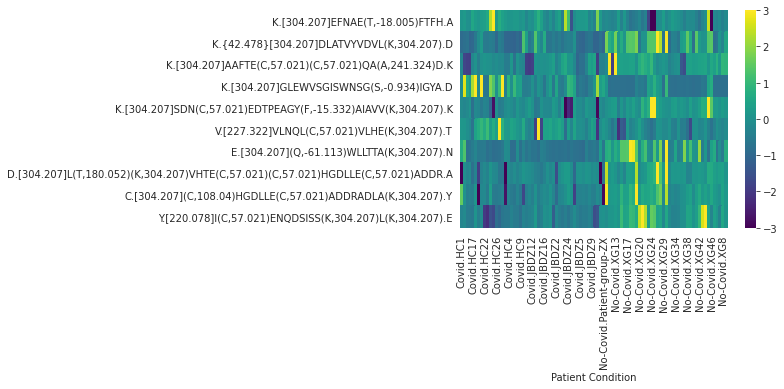

In [ ]:
heatmap(output,res,False)

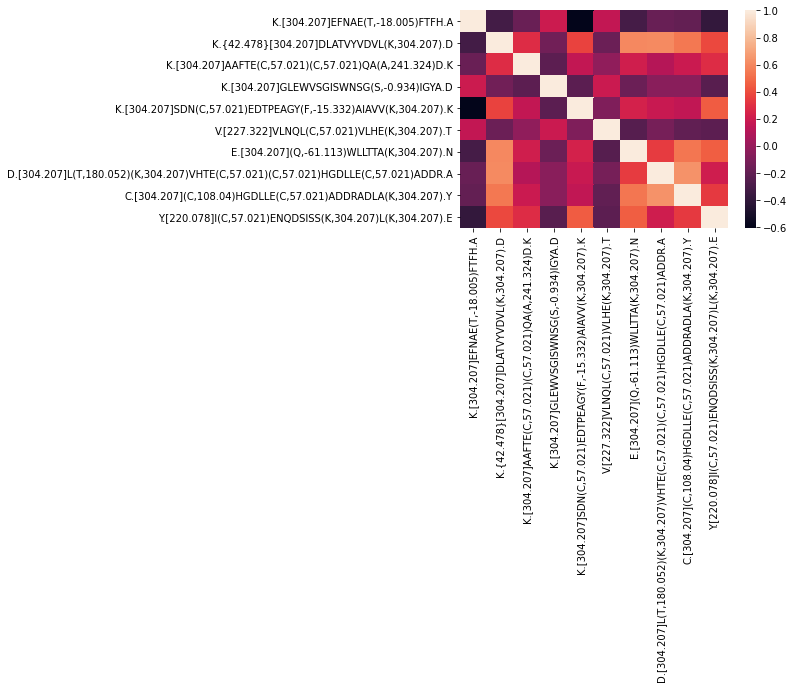

In [ ]:
import seaborn as sn
corr_matrix = new_df.corr()
sn.heatmap(corr_matrix)
plt.show()

In [ ]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( res[label], res[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all ) #feature-class

    # average feature-feature correlation
    corr = res[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean() #feature-feature

    print("feature-class correlation: " + str(rcf))
    print("feature-feature correlation: " + str(rff))
    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [ ]:
merit = getMerit(output, "Condition")
print("merit: " + str(merit))

feature-class correlation: 0.4533173693303322
feature-feature correlation: 0.2714861095278223
merit: 0.7725208322804775


In [ ]:
print(importances[indices[-num_features:]])
print(output)
unmodified = []
for i, peptide in enumerate(output):
  count = variants_processed[peptide].isna().sum()
  if count == 0:
    print(output[i])
    unmodified.append(output[i])

[0.00347196 0.00347652 0.00356037 0.00368699 0.00385185 0.00385554
 0.00406768 0.00413334 0.00414668 0.00415464 0.00418704 0.00426406
 0.00449705 0.00450155 0.00462694 0.00479018 0.00549639 0.00566098
 0.00655038 0.00664271 0.00667414 0.00854444 0.00867802 0.00945276
 0.01341348]
['A.[304.207](D,-16.207)DG(C,57.021)P(K,304.207)PPEIAHGYVEHSVR.Y', 'R.[304.207]RHPYFYAPELL(F,252.682)FA(K,304.207).R', 'K.[304.207]SLH(T,11.037)LFGD(K,304.207).L', 'K.[304.207]DVFLG(M,16.508)FLYEYAR.R', 'R.[304.207]E(T,318.195)YGEMAD(C,57.021)(C,57.021)A(K,304.207).Q', 'K.[304.207]YI(C,57.021)ENQ(D,-18.987)S.I', 'K.{14.998}[304.207]DIAPTLTLYVG(K,304.207).K', 'F.[304.207]A(Q,13.703)YLQQ(C,57.021)PFEDHV(K,304.207).L', 'K.[304.207](S,300.207)LHTLFGD(K,304.207).L', 'K.[304.207](L,-13.033)VNEVTEFA(K,304.207).T', 'A.{32.463}[304.207]GPSVFLFPP(K,304.207)P(K,304.207).D', 'K.[304.207]E(F,26.026)NAETFTFHADI(C,57.021)TLSE(K,304.207)ER.Q', 'K.[304.207]SL(H,57.024)TLFGD(K,304.207).L', 'K.[304.207]L(R,20.986)TEGDGVYTLNNE(K,

In [ ]:
variants_original.set_index('Peptide')

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,Num_G1_spectra_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
Peptide,,,,,,,,,,,,,,,,,,,,,
"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",1,1,.MODA.,specs_ms.mgf,960991,.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,0,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
"I.[304.207]FTEVEMTTLE(K,304.207).V",2,2,.MODA.,specs_ms.mgf,763982,.FTEVEMTTLEK.,3,11.686782,11.686782,0,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
K.[304.207]LYQPEYQEVSTEEQR.E,3,3,.MSGFPLUS.,specs_ms.mgf,902201,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,1,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
"K.[304.207]AANSLEAFIFETQD(K,304.207).L",4,4,.MSGFPLUS.,specs_ms.mgf,935503,.AANSLEAFIFETQDK.,3,15.016824,15.016824,0,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
"R.[304.207]YSHDF(N,-56.985)FH.I",5,5,.MODA.,specs_ms.mgf,297961,.YSHDFNFH.,3,33.768015,33.768015,0,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",101457,101457,.MODA.,specs_ms.mgf,480358,.YLGEEYVK.,3,15.671927,14.867811,118,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",101458,101458,.MODA.,specs_ms.mgf,237950,.YLGEEYVK.,4,13.932377,14.867811,118,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
"K.{187.018}[304.207]YLGEEYV(K,304.207).A",101459,101459,.MODA.,specs_ms.mgf,1037953,.YLGEEYVK.,2,14.412538,14.867811,118,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05


In [ ]:
output = [features[i] for i in indices[-num_features:]]
final_list = []
for i in range(len(output)-1,-1,-1):
  count_missing = variants_processed[output[i]].isna().sum()
  if count_missing < 45:
    final_list.append((output[i], len(output)-i))

In [ ]:
final_list

[('K.[304.207]GLEWVSGISWNSG(S,-0.934)IGYA.D', 7),
 ('K.[304.207]EFNAE(T,-18.005)FTFH.A', 10),
 ('K.[304.207]SL(H,57.024)TLFGD(K,304.207).L', 13),
 ('K.[304.207](L,-13.033)VNEVTEFA(K,304.207).T', 16),
 ('K.[304.207](S,300.207)LHTLFGD(K,304.207).L', 17),
 ('K.[304.207]DVFLG(M,16.508)FLYEYAR.R', 22),
 ('K.{29.027}[304.207]T(C,57.021)VADESAEN(C,57.021)D(K,304.207).S', 26),
 ('K.[304.207]LLDN(W,19.997)DSVTSTFS(K,304.207).L', 28),
 ('A.[304.207]VSEHEAT(K,304.207).C', 30),
 ('M.[304.207](P,39.161)ADLPSLAADFVES(K,304.207).D', 32),
 ('P.[304.207](C,-3.095)AEDYLSVVLNQL(C,57.021)VLHE(K,304.207).T', 33),
 ('R.[304.207]ETYG(E,40.038)MAD(C,57.021)(C,57.021)A(K,304.207).Q', 38),
 ('D.[304.207](K,358.117)ET(C,57.021)FAEEG(K,304.207)(K,304.207).L', 43),
 ('K.[304.207](Y,57.026)GMVAQVTQTL(K,304.207).L', 49)]

In [ ]:
unmodified

['K.[304.207]DVFLG(M,16.508)FLYEYAR.R',
 'K.[304.207](S,300.207)LHTLFGD(K,304.207).L',
 'K.[304.207](L,-13.033)VNEVTEFA(K,304.207).T',
 'K.[304.207]SL(H,57.024)TLFGD(K,304.207).L']

In [ ]:
variants_original.head()

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04


In [ ]:
variants_original.head()

In [ ]:
import pickle

# save
with open('model_rf_imputed.pkl','wb') as f:
    pickle.dump(rf_random,f)

In [ ]:
from matplotlib import pyplot
# get importance
importance = best_random.feature_importances_
pyplot.bar(X_train.columns, importance)
pyplot.show()